# Question 1

The complex step difference is given by

\begin{equation}
    \frac{df}{dx} = \frac{\mathrm{Im}[f(x + ih)]}{h} + \mathcal{O}(h^2).
\end{equation}

The centered finite difference is given by

\begin{equation}
    \frac{df}{dx} = \frac{f(x + h) - f(x - h)}{2h} + \mathcal{O}(h^2).
\end{equation}

[]

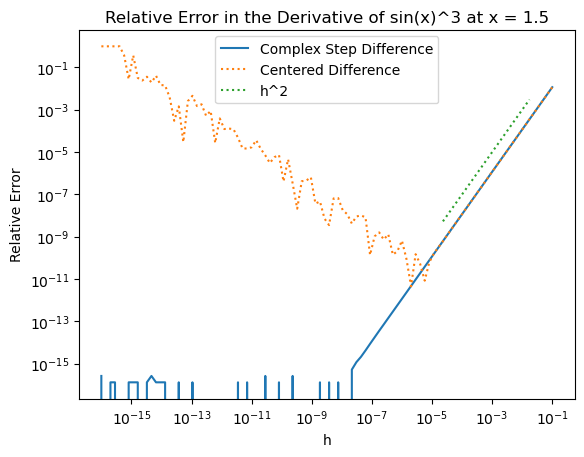

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Complex step difference
def deriv(func, x, h):
    return np.imag(func(x+1j*h))/h

# Centered finite difference
def center_deriv(func, x, h):
    return (func(x+h) - func(x-h))/(2*h)

def f(x):
    return np.sin(x)**3

x = 1.5
h = np.logspace(-16, -1, 100)

# Calculate the derivative of f(x) at x=1.5
df = deriv(f, x, h)
df_center = center_deriv(f, x, h)
actual = 3*np.sin(x)**2*np.cos(x)

# Calculate relative error
error = abs(df - actual)/actual
error_center = abs(df_center - actual)/actual

# Plotting
plt.plot(h, error, label='Complex Step Difference')
plt.plot(h, error_center, ':', label='Centered Difference')
plt.plot(h[-25:-5], 10*h[-25:-5]**2, ':', label='h^2')
plt.xlabel('h')
plt.ylabel('Relative Error')
plt.title('Relative Error in the Derivative of sin(x)^3 at x = 1.5')
plt.legend()
plt.loglog()

We can see from the plot that up to a step size of $h = 10^{-5}$, both methods have an error that scale quadratically with h as expected. However, for the centered finite difference method, the error grows larger as the step size decreases further. This is due to the substraction term in the numerator. The difference is so small that the significant digits are lost with finite machine precision. On the other hand, the complex step difference method goes all the way to $10^{-15}$, hitting round-off error as there is no substraction in the numerator.

# Question 2

The time-independent Schrödinger equation is given by

\begin{equation}
    -\frac{\hbar^2}{2m} \frac{d^2\Psi}{dx^2} + V(x)\Psi = E\Psi.
\end{equation}

For simplicity, we set $h^2/2m = 1$. Using finite diffferencing, we can rewrite the equation as

\begin{equation}
    -\frac{\Psi_{i-1} - 2\Psi_i + \Psi_{i+1}}{(\Delta x)^2} + V(x_i)\Psi_i = E\Psi_i.
\end{equation}

In matrix form, we get

\begin{equation}
    \mathbf{H}\Psi = E\Psi,
\end{equation}

where $\mathbf{H}$ is a tridiagonal matrix with $2/(\Delta x)^2+V(x_i)$ on the main diagonal and $-1/(\Delta x)^2$ on the off-diagonals.

The ground state energy is  -0.3003212398924633


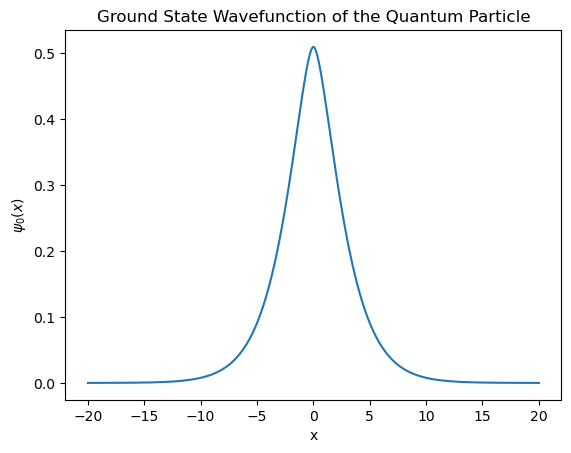

-0.3003212398924633

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg

def ground_state(N, plot=False):
    
    # Set up grid
    xrange = 20
    dx = (2 * xrange) / (N - 1)
    x = np.linspace(-xrange, xrange, N)

    # Potential function
    def V(x):
        return -np.exp(-np.sqrt(np.abs(x)))

    # Construct H
    n = len(x)
    H = ((np.diag(2 * np.ones(n))
         - np.diag(np.ones(n - 1), 1)
         - np.diag(np.ones(n - 1), -1)) / dx**2
         + np.diag(V(x)))

    eigenvalues, eigenvectors = scipy.linalg.eigh(H)
    E0 = eigenvalues[0]
    psi0 = eigenvectors[:, 0]
    print("The ground state energy is ", E0)

    # Normalize the wavefunction
    psi0 = psi0 / np.sqrt(np.sum(psi0**2) * dx)

    # Plotting
    if plot:
        plt.plot(x, psi0)
        plt.title('Ground State Wavefunction of the Quantum Particle')
        plt.xlabel('x')
        plt.ylabel('$\psi_0(x)$')
        plt.show()

    return E0

ground_state(1000, True)

We can check the accuracy of the energy by repeatedly using a finer grid and calculate the difference in the ground state energy between two successive trials. We want to observe the difference decay to 0 as the number of gridpoints increases.

In [17]:
# Calculate the error as a function of the number of gridpoints
grids = np.arange(1000, 3000, 250)
energies = []
for n in grids:
    energies.append(ground_state(n))
error = np.abs(np.diff(energies))

The ground state energy is  -0.3003212398924633
The ground state energy is  -0.3003854205569624
The ground state energy is  -0.30042449260337506
The ground state energy is  -0.30045035726142216
The ground state energy is  -0.3004685258641166
The ground state energy is  -0.30048186657053716
The ground state energy is  -0.3004920047980185
The ground state energy is  -0.30049992372414097


Text(0, 0.5, 'Error in Energy')

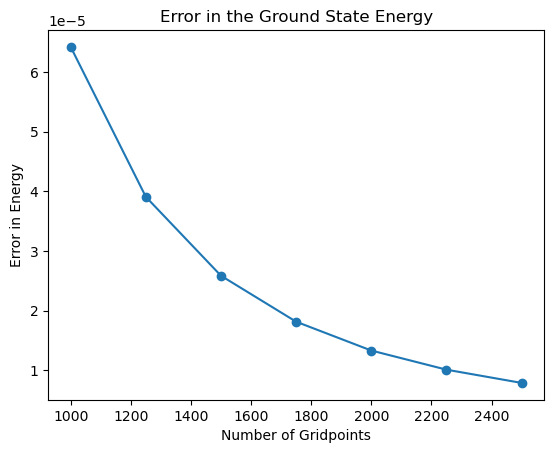

In [20]:
plt.plot(grids[:-1], error, '-o')
plt.title('Error in the Ground State Energy')
plt.xlabel('Number of Gridpoints')
plt.ylabel('Error in Energy')

We can see that the error is indeed tending towards $0$ and the error is on the scale of $10^{-5}$. Therefore, we can say that using a grid of $1000$ points, the ground state energy is $-0.3003212398924633$ and it is accurate to at least $1$ part in $1000$.

# Question 3

The 1D thermal diffusion equation that we consider is

\begin{equation}
    \frac{{\partial T}}{{\partial t}} = \kappa\frac{{\partial^2 T}}{{\partial x^2}}.
\end{equation}

We can rewrite the equation into an ODE using finite differencing

\begin{equation}
    \frac{dT_i}{dt} = \kappa_i \frac{T_{i+1}-2T_i+T_{i-1}}{(\Delta x)^2}.
\end{equation}

Using Backward-Euler, we get

\begin{equation}
    T_i^{n+1} = T_i^n + \kappa_i \Delta t\left(\frac{T_{i+1}^{n+1}-2T_i^{n+1}+T_{i-1}^{n+1}}{(\Delta x)^2}\right).
\end{equation}

We define $\alpha_i \equiv \kappa_i \Delta t / (\Delta x)^2$ and get

\begin{equation}
    T_i^{n+1} = T_i^n + \alpha_i \left(T_{i+1}^{n+1}-2T_i^{n+1}+T_{i-1}^{n+1}\right),
\end{equation}

\begin{equation}
    -\alpha_i T_{i-1}^{n+1} + (1+2\alpha_i) T_i^{n+1} - \alpha_i T_{i+1}^{n+1} = T_i^n.
\end{equation}

At $x=0$ we have an insulating boundary. Therefore, we have $T_0=T_1$ and the update equation becomes

\begin{equation}
    -\alpha_1 T_1^{n+1} + (1+2\alpha_1) T_1^{n+1} - \alpha_1 T_2^{n+1} = T_1^n,
\end{equation}

\begin{equation}
    (1+\alpha_1) T_1^{n+1} - \alpha_1 T_2^{n+1} = T_1^n,
\end{equation}

and we replace the top left term on the main diagonal of the matrix by $1+\alpha$.

The file provides only a few values of $\kappa$. We use the interpolation routine from Scipy to work on a finer grid.

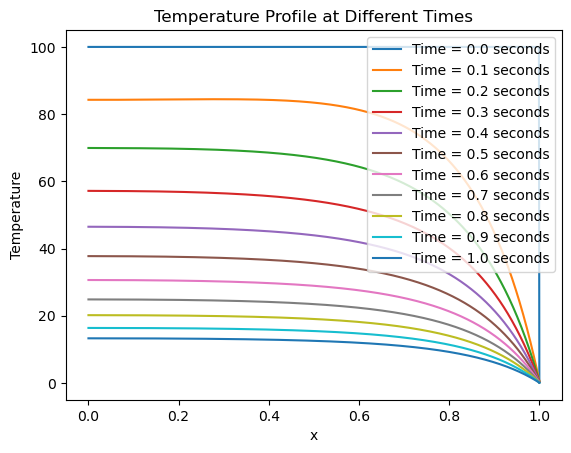

13.277236476726413


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
from scipy.interpolate import interp1d

n = 1001
x = np.linspace(0, 1, n)

# Initial profile has T=100 everywhere except T=0 at x=1
T = np.ones(n)*100
T[-1] = 0

plt.plot(x, T, label = 'Time = 0.0 seconds')
plt.xlabel('x')
plt.ylabel('Temperature')
plt.title('Temperature Profile at Different Times')

dx = x[1]-x[0]
dt = 0.01
alpha = dt/dx**2
nsteps = 100

# Calculate diffusivity
data = np.loadtxt('final_data.txt').T
k = interp1d(data[0], data[1], kind='cubic')(x)

# Calculate the matrix A in banded form
b = (1 + 2 * alpha * k) * np.ones(n)
b[0] = 1 + alpha * k[0]
a = -alpha * k * np.ones(n)
c = -alpha * k * np.ones(n)
c[-1] = 0.0
a[0] = 0.0
AA = np.row_stack((a,b,c))

# and the b vector (boundaries)
bvec = np.zeros(n)

for i in range(1,nsteps+1):
    T = scipy.linalg.solve_banded((1,1), AA, T + alpha*bvec)
    if i % 10 == 0:
        plt.plot(x, T, label = f'Time = {round(i*dt,1)} seconds')
plt.legend()
plt.show()

print(T[0])

At $t=1$ second, the temperature at the base of the slab is approximately $13.277\mathrm{K}$.

# Question 4

Radioactive decay is governed by

\begin{equation}
    \frac{dN}{dt} = - \frac{N}{\tau}.
\end{equation}

The solution of this differential equation is well-known:

\begin{equation}
    N(t) = N_oe^{-t/\tau},
\end{equation}

where $N_o$ is the initial number of atoms.

In the calculation, we can omit the minus sign as it only means that the energy is released from the system.

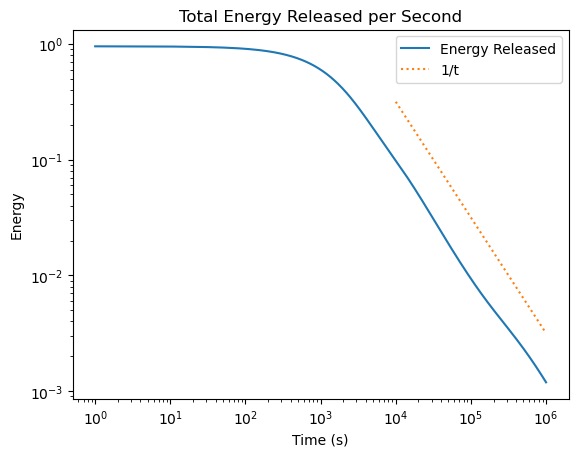

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Set up parameters, generate decay times
N = 100
initial_atoms = 100
times = np.linspace(1, 10**6, 100000)
atoms = np.ones(N)*initial_atoms
taus = 10**np.random.uniform(3, 7, N)
energies = np.zeros_like(times)

# Calculate energy released
for i, t in enumerate(times):
    atoms = initial_atoms * np.exp(-t/taus)
    energies[i] = np.sum(atoms/taus)

# Plotting
plt.plot(times, energies, label='Energy Released')
plt.plot(times[1000:], 10**3.5/times[1000:], ':', label='1/t')
plt.title('Total Energy Released per Second')
plt.xlabel('Time (s)')
plt.ylabel('Energy')
plt.loglog()
plt.legend()

We can see from the plot that total energy per second is a power law, decaying $\propto  1/t$. However, we can only observe this scaling after $10^3$ seconds. This is expected because the lowest decay timescale of the $100$ elements is $10^3$ seconds.